# Assignment 1: Làm quen với Python cho xử lý ảnh

Trong bài tập này ta sẽ làm quen với các thao tác lập trình cơ bản trong Python dành cho xử lý ảnh. Các thư viện sẽ được sử dụng trong bài tập này gồm có: os, numpy, opencv.

In [2]:
import os
import numpy as np
import cv2

## Bài tập 1: Làm quen với thư viện os
Trong các project về trí tuệ nhân tạo nói chung và thị giác máy tính nói riêng, việc sử dụng thành thạo các hàm trong thư viện os là rất quan trọng, đặc biệt hữu ích trong quá trình chuẩn bị dữ liệu. Chúng ta sẽ thực hành một vài hàm cơ bản, các hàm khác có thể tham khảo tại: https://docs.python.org/2/library/os.html

- Hàm os.listdir() liệt kê tên tất cả các tệp và thư mục nằm trong một thư mục nào đó. Ví dụ ta có thư mục image, sử dụng hàm này có thể liệt kê tên tất cả các ảnh có trong thư mục này:

In [4]:
os.listdir('image')

['2.jpg', '5.jpg', '4.jpg', '1.jpg', '3.jpg']

- Hàm os.path.join() nối các đường dẫn theo đúng format của hệ điều hành đang dùng. Ví dụ:

In [5]:
os.path.join('image', '1.jpg')

'image/1.jpg'

- Hàm os.path.abspath() trả về đường dẫn tuyệt đối đến đối tượng truyền vào. Ví dụ:

In [6]:
os.path.abspath('image')

'/home/hoangntbn/Desktop/VINIF/Practices/1. Intro to CV - inclass/image'

- Ngoài ra còn một vài hàm hay được sử dụng:

os.path.isdir(dir): Kiểm tra một đường dẫn thư mục có tồn tại hay không?

os.mkdir: Tạo thư mục ứng với đường dẫn truyền vào

os.makedirs: Tạo thư mục với option -recursive, tức là nếu tạo thư mục images/class và thư mục images chưa tồn tại thì sẽ tự động tạo cả thư mục images.

### BÀI TẬP: Hãy tạo 2 danh sách (python list) chứa đường dẫn tuyệt đối và đường dẫn tương đối đến các tệp nằm trong thư mục 'image'

In [7]:
abs_path = []
rel_path = []

#### YOUR CODE HERE ####
for _file in os.listdir('image'):
    abs_path.append(os.path.abspath(_file))
    rel_path.append(os.path.join('image', _file))
#### END YOUR CODE #####
print(abs_path)
print(rel_path)

['/home/hoangntbn/Desktop/VINIF/Practices/1. Intro to CV - inclass/2.jpg', '/home/hoangntbn/Desktop/VINIF/Practices/1. Intro to CV - inclass/5.jpg', '/home/hoangntbn/Desktop/VINIF/Practices/1. Intro to CV - inclass/4.jpg', '/home/hoangntbn/Desktop/VINIF/Practices/1. Intro to CV - inclass/1.jpg', '/home/hoangntbn/Desktop/VINIF/Practices/1. Intro to CV - inclass/3.jpg']
['image/2.jpg', 'image/5.jpg', 'image/4.jpg', 'image/1.jpg', 'image/3.jpg']


# Bài tập 2: Làm quen với thư viện Numpy và OpenCV

Numpy là một trong những thư viện hay được sử dụng nhất trong Python, thư viện giúp chúng ta dễ dàng thực hiện các phép toán, các phép biến đổi trên ma trận nhiều chiều. 

OpenCV là một trong những framework tốt nhất hiện tại dùng trong xử lý ảnh với việc hỗ trợ rất nhiều hàm, phép biến đổi quan trọng, giúp cho việc lập trình các mô hình trở nên dễ dàng hơn rất nhiều. OpenCV chủ yếu xử lý trên các ảnh và video, mà ảnh và video lại được lưu dưới dạng các ma trận số có thể xử lý bằng thư viện numpy. Do đó việc thành thạo 2 thư viện này là yêu cầu bắt buộc.

- Đọc ảnh với OpenCV: Sử dụng hàm cv2.imread(path) để đọc ảnh với đường dẫn path, hàm trả về một đối tượng numpy array là một ma trận 3 chiều mô tả ảnh. Hàm img.shape sẽ trả về (height,width,channels) của ảnh

In [13]:
img = cv2.imread(rel_path[0])
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(162, 310, 3)


- Hiển thị ảnh: Trong OpenCV ta có hàm cv2.imshow() để hiển thị ảnh. Tuy nhiên cách hiển thị ảnh này sẽ tạo một cửa sổ mới để hiển thị. Để thuận tiện khi dùng jupyter notebook, ta sẽ thử hiển thị ảnh bằng thư viện matplotlib:

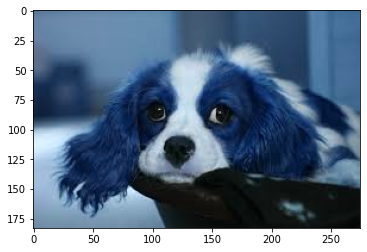

In [9]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

Như chúng ta có thể thấy, ảnh hiển thị bởi matplotlib có vẻ không giống với ảnh thật. Lý do là vì OpenCV lưu trữ ảnh theo thứ tự kênh màu B, G, R còn matplotlib hiển thị ảnh theo thứ tự kênh màu R, G, B. Tiếp theo ta sẽ học cách sử dụng OpenCV để thay đổi các kênh màu của ảnh.

- Thay đổi kênh màu ảnh: Hàm cv2.cvtColor(), hãy quan sát các ví dụ sau:

<class 'numpy.ndarray'>
(162, 310, 3)


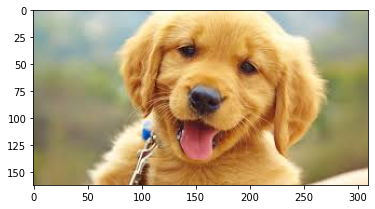

In [8]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(type(img2))
print(img2.shape)
plt.imshow(img2)
plt.show()

<class 'numpy.ndarray'>
(162, 310)


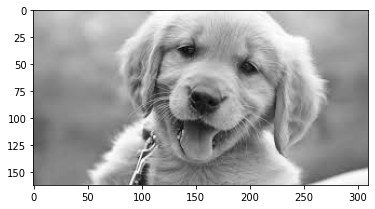

In [9]:
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(type(img3))
print(img3.shape)
plt.imshow(img3, cmap='gray')
plt.show()

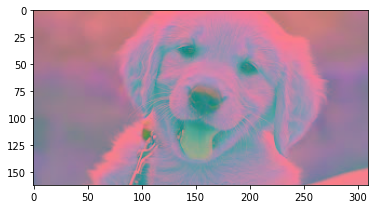

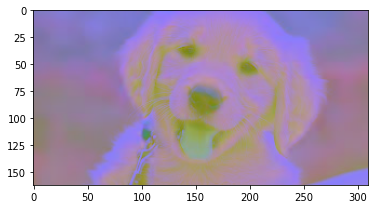

In [10]:
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
# cv2.imshow('image', img3)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(img3)
plt.show()

plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

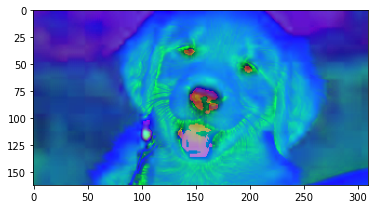

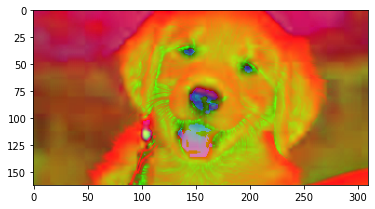

In [11]:
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# cv2.imshow('image', img3)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(img3)
plt.show()

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

- Thay đổi kích thước ảnh: Sử dụng hàm cv2.resize:

(100, 100, 3)


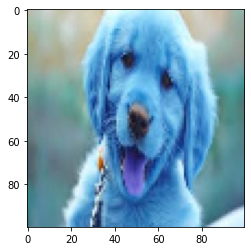

In [12]:
img4 = cv2.resize(img, (100, 100))
print(img4.shape)
plt.imshow(img4)
plt.show()

### Bài tập 2.1: Hiển thị các kênh màu của ảnh
Ở bài tập này ta sẽ hiển thị lần lượt các kênh màu B, G, R của ảnh ba chiều. Cách làm: Gán các giá trị cường độ màu tại các pixel của kênh màu không quan tâm bằng 0. Ví dụ: Nếu cần hiển thị kênh màu xanh lam (B) thì gán các giá trị cường độ màu G, R bằng 0:

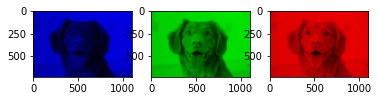

In [14]:
img = cv2.imread(rel_path[1])

b_channel = None
g_channel = None
r_channel = None

#### YOUR CODE HERE ####
b_channel = img.copy()
b_channel[:, :, 1:] = 0

g_channel = img.copy()
g_channel[:, :, [0, 2]] = 0

r_channel = img.copy()
r_channel[:, :, [0, 1]] = 0

#### END YOUR CODE #####

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(b_channel, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(g_channel, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(r_channel, cv2.COLOR_BGR2RGB))
plt.show()

### Bài tập 2.2: Xây dựng vector histogram của ảnh xám

Bài tập này giúp bạn làm quen với thao tác trên mảng numpy. Bạn cần lập trình tính giá trị vector histogram, đây là vector gồm 256 phần tử, phần tử thứ i là số lần xuất hiện của giá trị cường độ i trong ảnh xám 'gray':

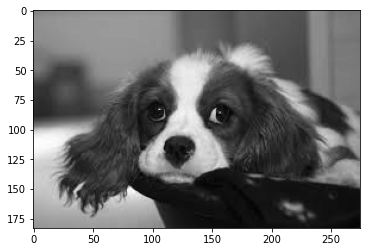

(183, 275)
(256,)


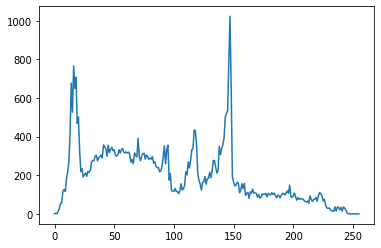

In [26]:
img = cv2.imread(rel_path[2])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()
print(gray.shape)
histogram = np.zeros((256, ))
print(histogram.shape)

#### YOUR CODE HERE ####
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        histogram[gray[i][j]] += 1
#### END YOUR CODE #####
plt.plot(histogram)
plt.show()

Ngoài ra để biểu diễn histogram có thể sử dụng hàm sau:
plt.hist() - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

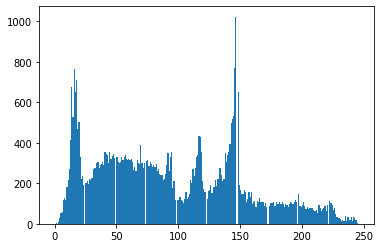

In [38]:
plt.hist(gray.ravel(),bins=256); plt.show()

Hãy thử nghiệm thay đổi các giá trị bins khác nhau

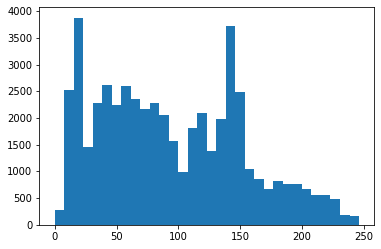

In [39]:
plt.hist(gray.ravel(),bins=32); plt.show()

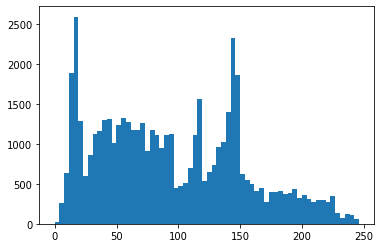

In [40]:
plt.hist(gray.ravel(),bins=64); plt.show()

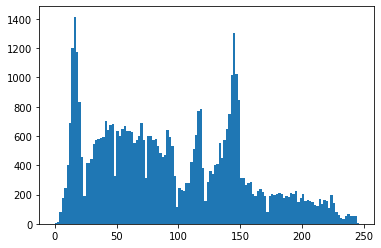

In [41]:
plt.hist(gray.ravel(),bins=128); plt.show()